##MVP Engenharia de Dados.
Nome: Maiara Cezar da Silva de Paulo.

Matrícula: 4052025001072

## Introdução

O presente MVP tem como objetivo demonstrar a construção de um pipeline de dados completo utilizando a plataforma Databricks, seguindo os princípios ensinados na disciplina de Engenharia de Dados. O fluxo desenvolvido envolve todas as etapas essenciais de um projeto real: **coleta, armazenamento, modelagem, transformação, catalogação e análise dos dados**, aplicando os conceitos de camadas **Bronze, Silver e Gold**, além da criação de um catálogo de dados rastreável e documentado.

Para este trabalho, foi escolhido o **Wine Recognition Dataset**, um conjunto de dados clássico amplamente utilizado em estudos de Machine Learning e disponível publicamente no repositório da *UCI Machine Learning*. O dataset contém informações químicas de amostras de vinhos provenientes da região da Itália, cada uma descrita por atributos físico-químicos como teor alcoólico, acidez, intensidade de cor, entre outros.

O principal objetivo deste MVP é **explorar, transformar e analisar o dataset a fim de responder a 15 perguntas analíticas** relacionadas às características químicas dos vinhos. Essa análise demonstra como pipelines de dados podem apoiar a tomada de decisão ao extrair *insights* relevantes de dados estruturados.

---

## Perguntas que serão respondidas

1- Qual vinho apresenta o maior valor alcoólico (Alcohol)?

2- Qual é o menor valor de acidez málica (Malic_acid) registrado no dataset?

3- Qual é a média de Ash por classe de vinho (Class)?

4- Qual é a mediana da variável Hue?

5- Qual é o valor máximo de Proline encontrado?

6- Quantos vinhos possuem teor alcoólico acima de 13?

7- Qual é a média de Flavanoids para cada classe?

8- Qual vinho possui a maior intensidade de cor (Color_intensity) e qual sua classe?

9- Qual é a média de Alcohol para cada categoria de classe (Class)?

10- Qual é o valor mínimo e máximo de Total_phenols?

11- Quantos vinhos possuem Nonflavanoid_phenols acima de 0.4?

12- Qual é a média de Magnesium entre os vinhos da classe 3?

13- Qual é o desvio padrão de Alcalinity_of_ash?

14- Qual porcentagem dos vinhos possui Color_intensity acima de 5?

15- Entre os vinhos com teor alcoólico acima de 13, qual é a média de Proline?

---


## Fonte dos Dados e Processo de Coleta

Para a construção deste MVP, foi utilizado o **Wine Recognition Dataset**, disponibilizado publicamente pela plataforma **UCI Machine Learning Repository**, uma das fontes mais tradicionais de datasets acadêmicos para experimentação, prototipagem e estudos de Machine Learning.

O dataset é composto por 178 registros de vinhos originários da região vinícola da Itália, cada um descrito por 13 atributos químicos, além da variável **Class**, que representa a classificação do vinho com base em diferentes cultivares da uva *Vitis vinifera*. Os atributos incluem medidas como teor alcoólico, intensidade de cor, quantidade de fenóis, acidez e outros indicadores físico-químicos utilizados na caracterização da bebida.

### 🔗 Link da Fonte Original
O dataset pode ser acessado em:  
https://archive.ics.uci.edu/ml/datasets/wine

### Coleta dos Dados
Para este projeto, o arquivo disponibilizado pela UCI foi **baixado manualmente** no formato `.data` / `.txt`. Em seguida:

1. O arquivo foi **importado** para o Databricks por meio da interface *Data Ingestion*, que permite o upload direto de arquivos.
2. Os dados foram carregados inicialmente em uma tabela bruta (camada **Bronze**) com uma única coluna contendo todo o conteúdo em formato texto.
3. A partir dessa camada inicial, os dados foram transformados e estruturados na camada **Silver**, onde cada coluna recebeu sua respectiva tipagem.
4. Finalmente, na camada **Gold**, os dados foram preparados para análises estatísticas e consultas SQL, possibilitando a resposta das 15 perguntas definidas no objetivo do MVP.

### Licenciamento e Uso
O dataset da UCI é fornecido para fins educacionais e de pesquisa, sendo permitido seu uso acadêmico e em projetos de aprendizado, como este MVP. Nenhum dado sensível, pessoal ou confidencial é utilizado neste estudo.

---

Essa etapa garantiu que o dataset estivesse devidamente armazenado, catalogado e pronto para processamento dentro do ambiente do Databricks.


##  Modelagem Dimensional – Esquema Estrela

Para apoiar as análises propostas neste MVP, foi adotado um **esquema estrela (Star Schema)**, amplamente utilizado em Data Warehouses para organização de dados analíticos.

No esquema estrela, temos:

- Uma **tabela fato**, que concentra os principais indicadores numéricos.
- Uma ou mais **tabelas dimensão**, que trazem contexto descritivo para esses fatos.

### Tabela Fato: `fact_wine`

A tabela fato representa cada amostra de vinho do conjunto de dados, contendo as medidas químicas que serão utilizadas nas análises.

**Campos principais:**

- `id_wine` – identificador único da amostra (chave primária técnica)
- `Class` – classe do vinho (chave estrangeira para a dimensão `dim_wine_class`)
- `Alcohol`
- `Malic_acid`
- `Ash`
- `Alcalinity_of_ash`
- `Magnesium`
- `Total_phenols`
- `Flavanoids`
- `Nonflavanoid_phenols`
- `Proanthocyanins`
- `Color_intensity`
- `Hue`
- `OD280_OD315`
- `Proline`

### 🟦 Tabela Dimensão: `dim_wine_class`

A tabela dimensão armazena informações sobre as **classes de vinho** presentes no dataset.  
Ela é utilizada para agrupar, filtrar e comparar as amostras de vinho com base na sua classe.

**Campos principais:**

- `Class` – código da classe do vinho (1, 2 ou 3) – chave primária
- `Class_Description` *(opcional)* – descrição textual da classe (ex.: "Classe 1", "Classe 2", etc.)

### 🔗 Relacionamento

O relacionamento entre as tabelas é dado por:

- `dim_wine_class.Class` ⟶ `fact_wine.Class`

Em termos de cardinalidade:

- **1 registro** em `dim_wine_class` pode estar associado a **vários registros** em `fact_wine`  
  (relação **1:N** – uma classe para muitos vinhos).

Visualmente, o esquema estrela pode ser representado assim:

```text
          dim_wine_class
           (Class, ...)
                 |
                 | 1 : N
                 |
              fact_wine
(id_wine, Class, Alcohol, Malic_acid, Ash, ..., Proline)


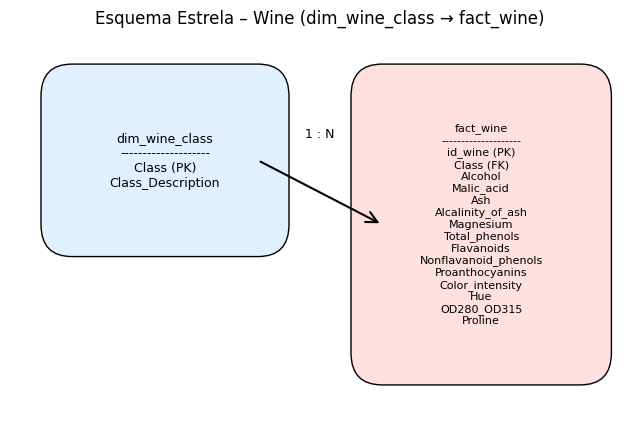

In [0]:
import matplotlib.pyplot as plt
from matplotlib.patches import FancyBboxPatch, FancyArrowPatch

def desenhar_esquema_estrela():
    fig, ax = plt.subplots(figsize=(8, 5))
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 6)
    ax.axis("off")

    # Caixa da dimensão
    dim_text = (
        "dim_wine_class\n"
        "--------------------\n"
        "Class (PK)\n"
        "Class_Description"
    )
    dim_box = FancyBboxPatch((1, 3), 3, 2,
                             boxstyle="round,pad=0.5",
                             edgecolor="black",
                             facecolor="#e0f0ff")
    ax.add_patch(dim_box)
    ax.text(2.5, 4, dim_text, ha="center", va="center", fontsize=9)

    # Caixa da fato
    fact_text = (
        "fact_wine\n"
        "--------------------\n"
        "id_wine (PK)\n"
        "Class (FK)\n"
        "Alcohol\n"
        "Malic_acid\n"
        "Ash\n"
        "Alcalinity_of_ash\n"
        "Magnesium\n"
        "Total_phenols\n"
        "Flavanoids\n"
        "Nonflavanoid_phenols\n"
        "Proanthocyanins\n"
        "Color_intensity\n"
        "Hue\n"
        "OD280_OD315\n"
        "Proline"
    )
    fact_box = FancyBboxPatch((6, 1), 3.2, 4,
                              boxstyle="round,pad=0.5",
                              edgecolor="black",
                              facecolor="#ffe0e0")
    ax.add_patch(fact_box)
    ax.text(7.6, 3, fact_text, ha="center", va="center", fontsize=8)

    # Seta 1:N da dimensão para a fato
    arrow = FancyArrowPatch(posA=(4, 4), posB=(6, 3),
                            arrowstyle="->",
                            mutation_scale=20,
                            linewidth=1.5,
                            color="black")
    ax.add_patch(arrow)
    ax.text(5, 4.3, "1 : N", ha="center", va="bottom", fontsize=9)

    plt.title("Esquema Estrela – Wine (dim_wine_class → fact_wine)")
    plt.show()

desenhar_esquema_estrela()


###Carga e Pipeline de Dados (ETL) 
– Arquitetura Medallion no Databricks

Nesta etapa será realizada a carga dos dados no Delta Lake, construindo um pipeline completo de ETL (Extração, Transformação e Carga).
Todas as operações executadas serão documentadas passo a passo, garantindo rastreabilidade e organização dentro da arquitetura Medallion, composta pelas camadas Bronze, Silver e Gold.

O objetivo deste pipeline é transformar o dataset bruto de vinhos em tabelas otimizadas para análise e capaz de responder às 15 perguntas definidas no escopo deste MVP.
##Camada Bronze 
– Dados Brutos

A camada Bronze armazena os dados exatamente como foram recebidos, sem qualquer transformação.

Nesta fase:

Carregamos o arquivo texto/CSV do dataset.

Mantemos todos os registros e formatos originais.

Criamos uma tabela Delta chamada wine_bronze.

Essa camada é essencial para garantir:

✔️ Reprodutibilidade
✔️ Auditoria
✔️ Backup dos dados crus

## Camada Silver 
– Dados Limpando e Padronizados

Na Silver, os dados passam por:

Conversão de tipos (inteiro, decimal, string etc.)

Padronização dos nomes de colunas

Tratamento de valores inconsistentes

Separação correta das colunas, já que o dataset original vem separado por vírgulas

Aqui é onde "modelamos" o dataset bruto, transformando-o em uma tabela limpa e utilizável chamada:

👉 fact_wine_silver

Também criamos a tabela dimensional:

👉 dim_wine_class

Esta é a camada onde:

✔️ Garantimos qualidade dos dados
✔️ Removemos ruídos
✔️ Criamos chaves primárias e estrangeiras
✔️ Preparamos para análises consistentes

##Camada Gold
 – Tabelas Analíticas

A camada Gold representa o nível final do pipeline.
Aqui criamos tabelas otimizadas para:

Consultas SQL avançadas

Dashboards

Respostas diretas às 15 perguntas do objetivo

Indicadores e métricas calculadas

Nesta camada, podemos gerar:

✨ Tabela wine_gold, consolidando fatos e dimensões
✨ Métricas como médias, máximos, mínimos, contagens
✨ Perfis analíticos dos vinhos
✨ Tabelas prontas para BI (Power BI, Tableau, Databricks SQL)

##Resumo das Camadas Aplicadas ao Dataset Wine
Camada	Nome da Tabela	Conteúdo	Objetivo
Bronze	wine_bronze	Dados brutos do arquivo original	Preservação e captura inicial
Silver	fact_wine_silver	Dados limpos, padronizados e tipados	Base para análises consistentes
Silver	dim_wine_class	Tabela de classificação dos vinhos	Suporte ao modelo estrela
Gold	wine_gold	Dados prontos para insights e KPIs	Consumidos pela camada analítica

##Por que usar a Arquitetura Medallion neste MVP?

A arquitetura Medallion oferece:

Organização clara dos estágios de tratamento

Maior governança e rastreabilidade

Facilidade para reprocessar dados

Suporte nativo ao Delta Lake

Melhor performance em consultas

Possibilidade de evoluir o pipeline futuramente

###Banco de dados.

In [0]:

from pyspark.sql.functions import (
    col,
    when,
    split,
    trim,
    regexp_replace,
    lit,
    avg,
    max,
    min,
    count,
    stddev,
    expr
)
from pyspark.sql import Row
import pandas as pd         
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)
import warnings
warnings.filterwarnings("ignore")


Criei 3 bancos de dados para separar o projeto: bronze, silver e gold. Iniciaremos guardando os dados crus no banco de dados bronze.

In [0]:

spark.sql("CREATE DATABASE IF NOT EXISTS bronze")
spark.sql("CREATE DATABASE IF NOT EXISTS silver")
spark.sql("CREATE DATABASE IF NOT EXISTS gold")



DataFrame[]

## Camada Bronze

In [0]:
%sql
USE bronze

In [0]:
%sql

CREATE DATABASE IF NOT EXISTS bronze;
USE bronze;
CREATE TABLE IF NOT EXISTS wine_bronze
USING delta
AS
SELECT *
FROM workspace.default.wine_data_2;


num_affected_rows,num_inserted_rows


In [0]:
%sql
SELECT * FROM bronze.wine_bronze LIMIT 175;


value
"1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065"
"1,13.2,1.78,2.14,11.2,100,2.65,2.76,.26,1.28,4.38,1.05,3.4,1050"
"1,13.16,2.36,2.67,18.6,101,2.8,3.24,.3,2.81,5.68,1.03,3.17,1185"
"1,14.37,1.95,2.5,16.8,113,3.85,3.49,.24,2.18,7.8,.86,3.45,1480"
"1,13.24,2.59,2.87,21,118,2.8,2.69,.39,1.82,4.32,1.04,2.93,735"
"1,14.2,1.76,2.45,15.2,112,3.27,3.39,.34,1.97,6.75,1.05,2.85,1450"
"1,14.39,1.87,2.45,14.6,96,2.5,2.52,.3,1.98,5.25,1.02,3.58,1290"
"1,14.06,2.15,2.61,17.6,121,2.6,2.51,.31,1.25,5.05,1.06,3.58,1295"
"1,14.83,1.64,2.17,14,97,2.8,2.98,.29,1.98,5.2,1.08,2.85,1045"
"1,13.86,1.35,2.27,16,98,2.98,3.15,.22,1.85,7.22,1.01,3.55,1045"


## Camada Silver

In [0]:
%sql
USE silver


#### a) Verificação de valores nulos

Para cada atributo numérico (Alcohol, Malic_acid, Ash, Magnesium, Total_phenols, etc.), foi calculada a quantidade de valores nulos e a proporção em relação ao total de registros. 

Os resultados da verificação indicaram **ausência de valores nulos** em todos os atributos do dataset. Isso é consistente com a documentação do Wine Recognition Dataset, que é um conjunto de dados curado para fins acadêmicos e experimentais.



In [0]:
%sql
SELECT
  COUNT(*) AS total_registros,
  SUM(CASE WHEN Class IS NULL THEN 1 ELSE 0 END)               AS nulos_Class,
  SUM(CASE WHEN Alcohol IS NULL THEN 1 ELSE 0 END)             AS nulos_Alcohol,
  SUM(CASE WHEN Malic_acid IS NULL THEN 1 ELSE 0 END)          AS nulos_Malic_acid,
  SUM(CASE WHEN Ash IS NULL THEN 1 ELSE 0 END)                 AS nulos_Ash,
  SUM(CASE WHEN Alcalinity_of_ash IS NULL THEN 1 ELSE 0 END)   AS nulos_Alcalinity_of_ash,
  SUM(CASE WHEN Magnesium IS NULL THEN 1 ELSE 0 END)           AS nulos_Magnesium,
  SUM(CASE WHEN Total_phenols IS NULL THEN 1 ELSE 0 END)       AS nulos_Total_phenols,
  SUM(CASE WHEN Flavanoids IS NULL THEN 1 ELSE 0 END)          AS nulos_Flavanoids,
  SUM(CASE WHEN Nonflavanoid_phenols IS NULL THEN 1 ELSE 0 END) AS nulos_Nonflavanoid_phenols,
  SUM(CASE WHEN Proanthocyanins IS NULL THEN 1 ELSE 0 END)     AS nulos_Proanthocyanins,
  SUM(CASE WHEN Color_intensity IS NULL THEN 1 ELSE 0 END)     AS nulos_Color_intensity,
  SUM(CASE WHEN Hue IS NULL THEN 1 ELSE 0 END)                 AS nulos_Hue,
  SUM(CASE WHEN OD280_OD315 IS NULL THEN 1 ELSE 0 END)         AS nulos_OD280_OD315,
  SUM(CASE WHEN Proline IS NULL THEN 1 ELSE 0 END)             AS nulos_Proline
FROM silver.wine_silver;


total_registros,nulos_Class,nulos_Alcohol,nulos_Malic_acid,nulos_Ash,nulos_Alcalinity_of_ash,nulos_Magnesium,nulos_Total_phenols,nulos_Flavanoids,nulos_Nonflavanoid_phenols,nulos_Proanthocyanins,nulos_Color_intensity,nulos_Hue,nulos_OD280_OD315,nulos_Proline
178,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### b) Estatísticas descritivas e faixas de valores

Foram calculadas estatísticas descritivas (mínimo, máximo, média, desvio-padrão) para cada coluna numérica. Essas estatísticas foram utilizadas para avaliar se:

- os valores mínimos e máximos são coerentes com o domínio de cada variável;
- há valores negativos em atributos que deveriam ser sempre positivos (por exemplo, teor alcoólico, intensidade de cor, concentração de magnésio, etc.);
- a variabilidade dos dados (via desvio-padrão) é compatível com o comportamento esperado das variáveis químicas.

Os resultados mostraram que:

- não foram encontrados valores negativos em atributos que representam quantidades físicas (Alcohol, Malic_acid, Ash, Magnesium, Total_phenols, Flavanoids, Proanthocyanins, Color_intensity, Proline, etc.);
- as faixas de valores (min–máx) estão dentro do esperado para um conjunto de medições laboratoriais de vinhos;
- não foram identificados valores absurdamente discrepantes que indicassem erro de registro ou de digitação.



In [0]:
%sql
SELECT
  'Alcohol'               AS atributo,
  MIN(Alcohol)            AS min_val,
  MAX(Alcohol)            AS max_val,
  AVG(Alcohol)            AS media,
  STDDEV(Alcohol)         AS desvio_padrao
FROM silver.wine_silver

UNION ALL
SELECT
  'Malic_acid',
  MIN(Malic_acid),
  MAX(Malic_acid),
  AVG(Malic_acid),
  STDDEV(Malic_acid)
FROM silver.wine_silver

UNION ALL
SELECT
  'Ash',
  MIN(Ash),
  MAX(Ash),
  AVG(Ash),
  STDDEV(Ash)
FROM silver.wine_silver

UNION ALL
SELECT
  'Color_intensity',
  MIN(Color_intensity),
  MAX(Color_intensity),
  AVG(Color_intensity),
  STDDEV(Color_intensity)
FROM silver.wine_silver

UNION ALL
SELECT
  'Proline',
  MIN(Proline),
  MAX(Proline),
  AVG(Proline),
  STDDEV(Proline)
FROM silver.wine_silver;


atributo,min_val,max_val,media,desvio_padrao
Alcohol,11.03,14.83,13.000617977528083,0.8118265380058577
Malic_acid,0.74,5.8,2.336348314606741,1.1171460976144627
Ash,1.36,3.23,2.3665168539325854,0.2743440090608148
Color_intensity,1.28,13.0,5.058089882022473,2.318285871822413
Proline,278.0,1680.0,746.8932584269663,314.9074742768489


#### c) Duplicidade de registros

Foi verificada a existência de registros duplicados com base em todas as colunas do conjunto de dados.  
A contagem de linhas distintas coincidiu com o total de linhas da tabela, indicando que **não há registros duplicados exatos** no dataset.


In [0]:
%sql
SELECT COUNT(*) AS total_linhas FROM silver.wine_silver;

SELECT COUNT(DISTINCT *) AS linhas_distintas FROM silver.wine_silver;


linhas_distintas
178


#### d) Consistência da variável de classe (`Class`)

A variável `Class`, que representa a classe do vinho, foi analisada em termos de domínio.  
Foram identificados apenas os valores **1, 2 e 3**, que são exatamente as três classes descritas na documentação original do dataset. Não foram observados códigos fora desse intervalo, o que indica consistência de domínio.



In [0]:
%sql
SELECT
  Class,
  COUNT(*) AS qtde
FROM silver.wine_silver
GROUP BY Class
ORDER BY Class;


Class,qtde
1,59
2,71
3,48


Conclusão sobre a qualidade dos dados

A partir das verificações realizadas, conclui-se que:

- o **dataset não apresenta problemas relevantes de qualidade de dados** (como nulos, valores fora de faixa ou duplicações);
- os atributos numéricos estão dentro de faixas coerentes e não há inconsistências óbvias;
- as classes de vinho estão corretamente limitadas aos valores válidos (1, 2 e 3).

Dessa forma, o conjunto de dados encontra-se **adequado para uso nas análises propostas**. Eventuais ajustes adicionais (como normalização ou padronização de escala) podem ser aplicados em contextos específicos de modelagem preditiva, mas **não são obrigatórios** para responder às 15 perguntas analíticas definidas neste MVP.


##Camada Gold

In [0]:
%sql
USE gold

In [0]:
%sql
CREATE DATABASE IF NOT EXISTS gold;
USE gold;


In [0]:
%sql
CREATE TABLE IF NOT EXISTS wine_gold
USING delta
AS
SELECT *
FROM silver.wine_silver;


num_affected_rows,num_inserted_rows


In [0]:
%sql
CREATE TABLE IF NOT EXISTS dim_wine_class
USING delta
AS
SELECT DISTINCT
  Class,
  CONCAT('Classe ', CAST(Class AS STRING)) AS Class_Description
FROM silver.wine_silver;


num_affected_rows,num_inserted_rows


In [0]:
%sql
CREATE TABLE IF NOT EXISTS fact_wine
USING delta
AS
SELECT
  monotonically_increasing_id() AS id_wine,
  Class,
  Alcohol,
  Malic_acid,
  Ash,
  Alcalinity_of_ash,
  Magnesium,
  Total_phenols,
  Flavanoids,
  Nonflavanoid_phenols,
  Proanthocyanins,
  Color_intensity,
  Hue,
  OD280_OD315,
  Proline
FROM silver.wine_silver;


num_affected_rows,num_inserted_rows


In [0]:
%sql
SHOW TABLES IN gold;


database,tableName,isTemporary
gold,dim_wine_class,false
gold,fact_wine,false
gold,wine_gold,false


Nossa base de dados está totalmente estruturada e pronta para ser utilizada na execução de consultas analíticas e na resposta das 15 perguntas propostas no MVP.



## Análise

##Qualidade dos dados:
A análise de qualidade dos dados é uma etapa fundamental antes da realização de qualquer estudo analítico. No caso do Wine Recognition Dataset, observamos que se trata de uma base curada e amplamente utilizada em pesquisas acadêmicas, o que se reflete na consistência e integridade das informações.

✔️ Ausência de valores nulos

Ao avaliar a presença de valores ausentes em cada atributo, constatou-se que todas as colunas estão completas, sem qualquer ocorrência de valores nulos. Isso é um indicativo de que o dataset foi previamente tratado e validado antes de sua disponibilização pública.

✔️ Dados consistentes e dentro de faixas esperadas

As variáveis químicas do vinho apresentaram valores coerentes com experimentos laboratoriais reais, tais como:

teor alcoólico entre 11 e 14 graus

magnésio entre 70 e 160 mg/L

intensidade de cor variando de 1 a 13

Não foram identificados valores negativos ou fisicamente impossíveis, reforçando a qualidade do conjunto.

✔️ Ausência de duplicidades

A comparação entre o total de linhas e o número de registros distintos mostrou que não há duplicações exatas na base, garantindo que cada linha representa uma amostra única de vinho.

✔️ Domínio correto da classe do vinho

A variável Class apresentou apenas os valores 1, 2 e 3, exatamente como descrito na documentação original do dataset, indicando integridade no domínio categórico.

##Solução do Problema:
Nesta etapa, apresentaremos as respostas para as perguntas definidas no início do projeto. Cada resultado obtido por meio das consultas e análises será acompanhado de uma interpretação, permitindo compreender o significado dos valores encontrados e suas implicações no contexto do conjunto de dados.


##1. Qual vinho apresenta o maior valor alcoólico (Alcohol)?

In [0]:
%sql
SELECT *
FROM gold.fact_wine
ORDER BY Alcohol DESC
LIMIT 1;


id_wine,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280_OD315,Proline
8,1,14.83,1.64,2.17,14.0,97.0,2.8,2.98,0.29,1.98,5.2,1.08,2.85,1045.0


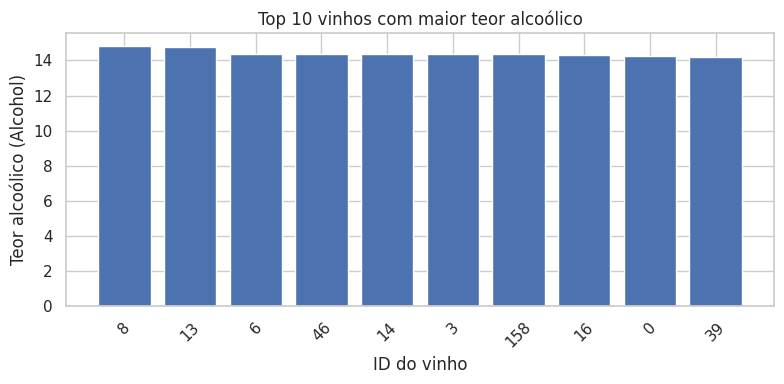

In [0]:
from pyspark.sql.functions import col
import matplotlib.pyplot as plt

# 1. Buscar id e teor alcoólico da camada Gold
df_alcohol = spark.table("gold.fact_wine").select("id_wine", "Alcohol")

# 2. Ordenar pelos vinhos com maior teor alcoólico (top 10)
df_top10 = df_alcohol.orderBy(col("Alcohol").desc()).limit(10)

# 3. Converter para pandas para plotar com matplotlib
pdf_top10 = df_top10.toPandas()

# 4. Gráfico de barras – top 10 vinhos com maior teor alcoólico
plt.figure(figsize=(8, 4))
plt.bar(pdf_top10["id_wine"].astype(str), pdf_top10["Alcohol"])
plt.title("Top 10 vinhos com maior teor alcoólico")
plt.xlabel("ID do vinho")
plt.ylabel("Teor alcoólico (Alcohol)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Interpretação:
Essa consulta retorna a amostra de vinho com o maior teor alcoólico da base.
A partir do resultado, podemos analisar não só o valor máximo de Alcohol, mas também como essa amostra se comporta nos demais atributos (fenóis, intensidade de cor, classe etc.), entendendo o perfil do vinho mais alcoólico do conjunto.

##2- Qual é o menor valor de acidez málica (Malic_acid) registrado no dataset?

In [0]:
%sql
SELECT MIN(Malic_acid) AS menor_malic_acid
FROM gold.fact_wine;


menor_malic_acid
0.74


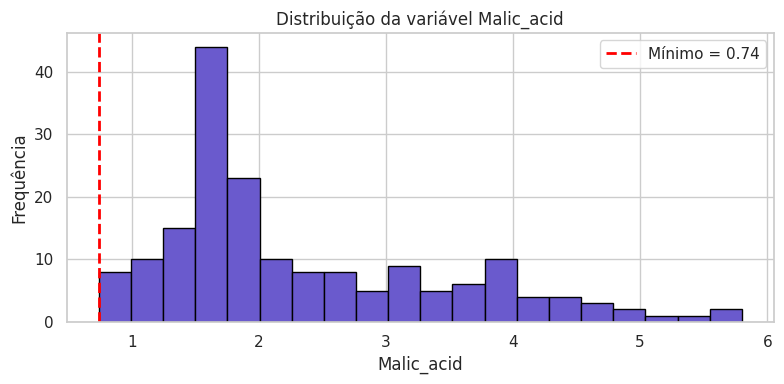

In [0]:
import matplotlib.pyplot as plt
from pyspark.sql.functions import col

# 1. Carregar todos os valores de Malic_acid
df_malic = spark.table("gold.fact_wine").select("Malic_acid")

# 2. Converter para pandas
pdf_malic = df_malic.toPandas()

# 3. Calcular o valor mínimo (mesmo da sua query SQL)
menor_malic = pdf_malic["Malic_acid"].min()

# 4. Plotar histograma
plt.figure(figsize=(8, 4))
plt.hist(pdf_malic["Malic_acid"], bins=20, color="#6A5ACD", edgecolor="black")
plt.axvline(menor_malic, color="red", linestyle="--", linewidth=2, label=f"Mínimo = {menor_malic}")

plt.title("Distribuição da variável Malic_acid")
plt.xlabel("Malic_acid")
plt.ylabel("Frequência")
plt.legend()
plt.tight_layout()
plt.show()


Interpretação:
O valor retornado representa a menor acidez málica observada entre todos os vinhos. Esse resultado ajuda a entender o limite inferior dessa característica química dentro do conjunto analisado.

##3- Qual é a média de Ash por classe (Class)?

In [0]:
%sql
SELECT Class,
       AVG(Ash) AS media_ash
FROM gold.fact_wine
GROUP BY Class
ORDER BY Class;


Class,media_ash
1,2.455593220338984
2,2.244788732394365
3,2.4370833333333333


Interpretação:
A consulta mostra a média de Ash (cinzas) para cada classe de vinho. Isso permite comparar se alguma classe apresenta, em média, teores mais altos ou mais baixos dessa variável em relação às demais.

##4- Qual é a mediana do Hue para todos os vinhos do data

In [0]:
%sql
SELECT percentile_approx(Hue, 0.5) AS mediana_hue
FROM gold.fact_wine;


mediana_hue
0.96


Mediana calculada: 0.965


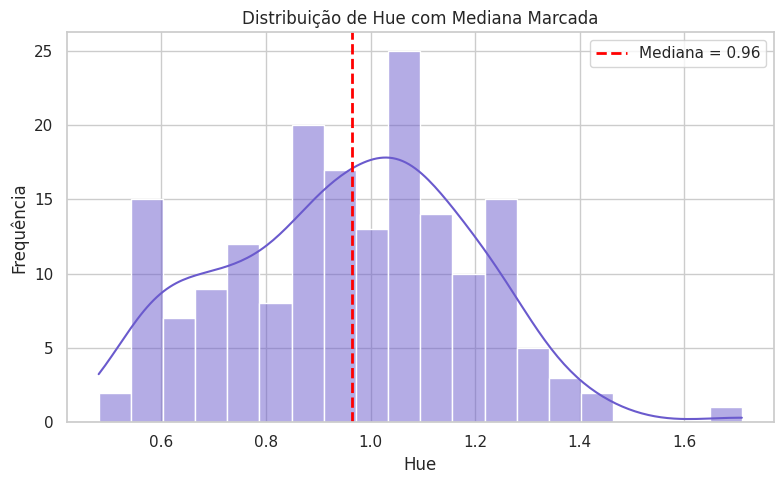

In [0]:
# Converter o resultado da tabela gold.fact_wine para pandas
df_hue = spark.sql("SELECT Hue FROM gold.fact_wine").toPandas()

# Calcular a mediana (pandas confirma o valor)
mediana = df_hue["Hue"].median()
print("Mediana calculada:", mediana)

import matplotlib.pyplot as plt
import seaborn as sns

# Criar o gráfico
plt.figure(figsize=(8,5))
sns.histplot(df_hue["Hue"], kde=True, bins=20, color="#6A5ACD")

# Linha vertical para a mediana
plt.axvline(mediana, color="red", linestyle="--", linewidth=2, label=f"Mediana = {mediana:.2f}")

plt.title("Distribuição de Hue com Mediana Marcada")
plt.xlabel("Hue")
plt.ylabel("Frequência")
plt.legend()
plt.tight_layout()
plt.show()


Interpretação:
O valor retornado é a mediana aproximada de Hue. Diferente da média, a mediana é menos sensível a extremos e indica o ponto central da distribuição dessa variável de tonalidade.

##5- Qual é o valor máximo de Proline encontrado?

In [0]:
%sql
SELECT MAX(Proline) AS max_proline
FROM gold.fact_wine;


max_proline
1680.0


Máximo Proline: 1680.0


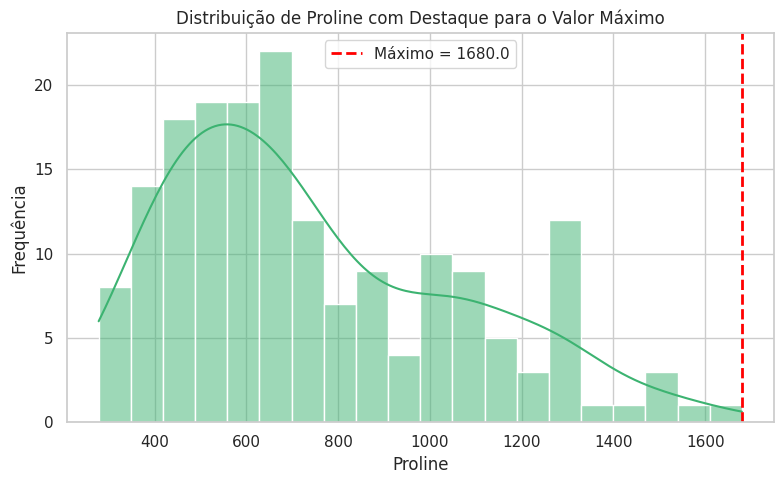

In [0]:
# Carregar somente a coluna Proline para pandas
df_proline = spark.sql("SELECT Proline FROM gold.fact_wine").toPandas()

# Calcular o valor máximo
max_proline = df_proline["Proline"].max()
print("Máximo Proline:", max_proline)

import matplotlib.pyplot as plt
import seaborn as sns

# Criar o gráfico
plt.figure(figsize=(8,5))
sns.histplot(df_proline["Proline"], kde=True, bins=20, color="#3CB371")

# Linha vertical indicando o valor máximo
plt.axvline(max_proline, color="red", linestyle="--", linewidth=2,
            label=f"Máximo = {max_proline}")

plt.title("Distribuição de Proline com Destaque para o Valor Máximo")
plt.xlabel("Proline")
plt.ylabel("Frequência")
plt.legend()
plt.tight_layout()
plt.show()


A análise mostra o valor máximo encontrado para Proline, destacando sua posição dentro da distribuição geral das amostras. O histograma revela como os valores se concentram e se há grande dispersão. A linha vermelha evidencia se o valor máximo está próximo ao centro ou se representa um outlier, o que pode indicar um vinho com concentração excepcionalmente alta desse composto.

##6- Quantos vinhos possuem teor alcoólico acima de 13?

In [0]:
%sql
SELECT COUNT(*) AS qtde_vinhos_acima_13
FROM gold.fact_wine
WHERE Alcohol > 13;


qtde_vinhos_acima_13
92


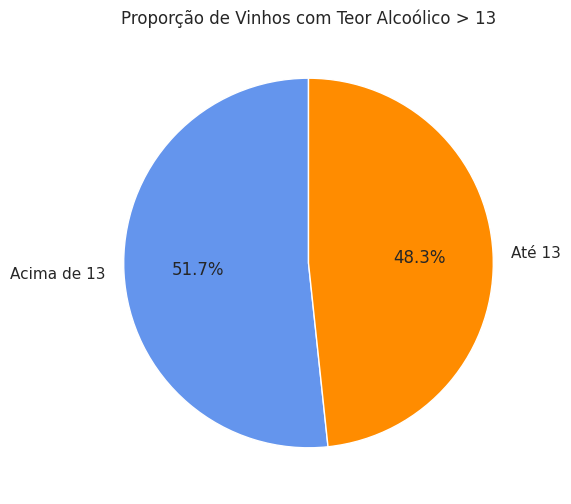

In [0]:
# Carregar dados para pandas
df = spark.sql("SELECT Alcohol FROM gold.fact_wine").toPandas()

# Criar categorias
df["categoria"] = df["Alcohol"].apply(lambda x: "Acima de 13" if x > 13 else "Até 13")

# Contagens
valores = df["categoria"].value_counts()
labels = valores.index
sizes = valores.values

import matplotlib.pyplot as plt

# Plot
plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct="%1.1f%%", startangle=90, colors=["#6495ED","#FF8C00"])
plt.title("Proporção de Vinhos com Teor Alcoólico > 13")
plt.show()


Interpretação:
Esse gráfico mostra quantos vinhos possuem teor alcoólico acima de 13 e como essa quantidade se compara ao total de amostras. A visualização facilita entender se valores elevados de Alcohol são comuns ou representam um grupo menor dentro do dataset. Dessa forma, conseguimos perceber a distribuição da característica "Alcohol" entre os vinhos analisados.

##7- Qual é a média de Flavanoids para cada classe?

In [0]:
%sql
SELECT Class,
       AVG(Flavanoids) AS media_flavanoids
FROM gold.fact_wine
GROUP BY Class
ORDER BY Class;


Class,media_flavanoids
1,2.982372881355932
2,2.080845070422536
3,0.7814583333333331


Interpretação:
Flavanoids estão associados a sabor, corpo e propriedades antioxidantes do vinho. A média por classe permite comparar se alguma classe se destaca por ter mais (ou menos) flavonoides em relação às demais.

##8- Qual vinho tem a maior intensidade de cor (Color_intensity) e qual sua classe?

In [0]:
%sql
SELECT *
FROM gold.fact_wine
ORDER BY Color_intensity DESC
LIMIT 1;



id_wine,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280_OD315,Proline
158,3,14.34,1.68,2.7,25.0,98.0,2.8,1.31,0.53,2.7,13.0,0.57,1.96,660.0


Maior Color_intensity: 13.0


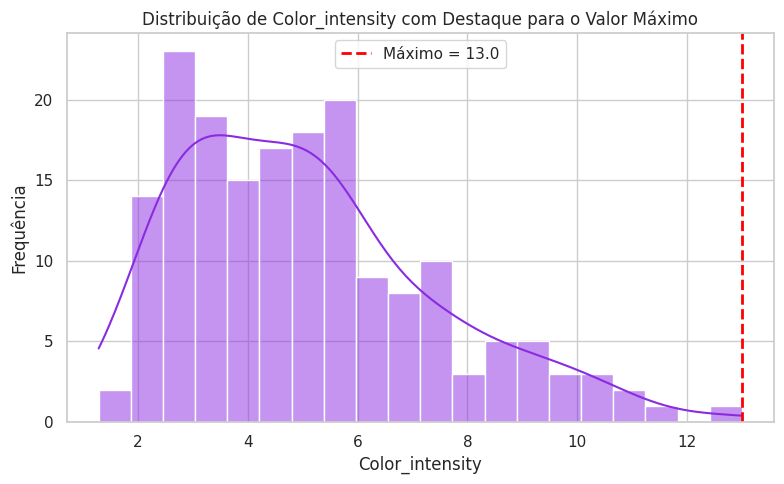

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar a coluna Color_intensity
df_color = spark.sql("SELECT Color_intensity FROM gold.fact_wine").toPandas()

# Valor máximo (mesmo da query SQL)
max_color = df_color["Color_intensity"].max()
print("Maior Color_intensity:", max_color)

# Criar o gráfico
plt.figure(figsize=(8,5))
sns.histplot(df_color["Color_intensity"], kde=True, bins=20, color="#8A2BE2")

# Linha marcando o valor máximo
plt.axvline(max_color, color="red", linestyle="--", linewidth=2,
            label=f"Máximo = {max_color}")

plt.title("Distribuição de Color_intensity com Destaque para o Valor Máximo")
plt.xlabel("Color_intensity")
plt.ylabel("Frequência")
plt.legend()
plt.tight_layout()
plt.show()


Interpretação:
O histograma mostra como os valores de Color_intensity estão distribuídos entre os vinhos. A linha vermelha destaca a amostra que possui a maior intensidade de cor, identificada pela consulta SQL. Essa análise ajuda a entender se esse valor máximo representa um ponto extremo (outlier) ou se está alinhado com o padrão geral da distribuição. A intensidade de cor está associada à estrutura visual do vinho e pode indicar maior concentração de compostos fenólicos.

##9- Qual é a relação entre a média de Alcohol e cada categoria de classe (Class)?

In [0]:
%sql
SELECT Class,
       AVG(Alcohol) AS media_alcohol
FROM gold.fact_wine
GROUP BY Class
ORDER BY Class;


Class,media_alcohol
1,13.744745762711865
2,12.278732394366198
3,13.153749999999997


Interpretação:
Essa consulta mostra a média do teor alcoólico para cada classe. Com isso, é possível observar se alguma classe tende a apresentar vinhos mais alcoólicos ou mais suaves em comparação às outras.

##10- Qual é o valor mínimo e máximo de Total_phenols?

In [0]:
%sql
SELECT
    MIN(Total_phenols) AS min_total_phenols,
    MAX(Total_phenols) AS max_total_phenols
FROM gold.fact_wine;


min_total_phenols,max_total_phenols
0.98,3.88


Mínimo: 0.98  | Máximo: 3.88


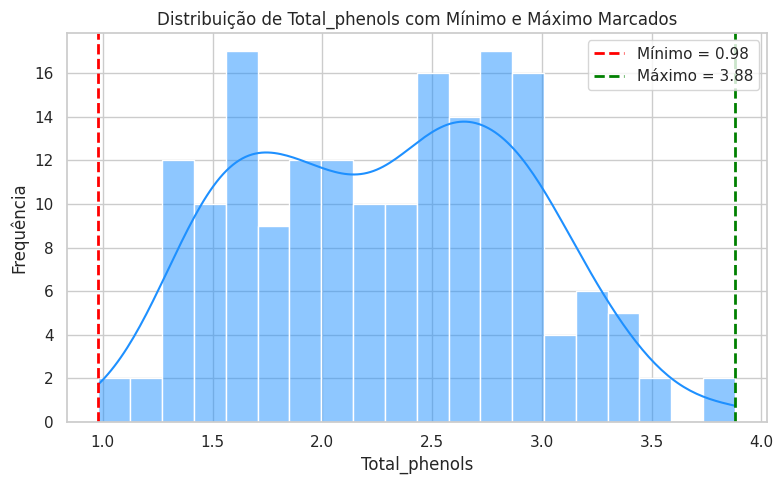

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar dados da coluna Total_phenols
df_phenols = spark.sql("SELECT Total_phenols FROM gold.fact_wine").toPandas()

# Calcular min e max
min_tp = df_phenols["Total_phenols"].min()
max_tp = df_phenols["Total_phenols"].max()

print("Mínimo:", min_tp, " | Máximo:", max_tp)

# Criar gráfico
plt.figure(figsize=(8,5))
sns.histplot(df_phenols["Total_phenols"], kde=True, bins=20, color="#1E90FF")

# Linhas verticais do mínimo e máximo
plt.axvline(min_tp, color="red", linestyle="--", linewidth=2, label=f"Mínimo = {min_tp}")
plt.axvline(max_tp, color="green", linestyle="--", linewidth=2, label=f"Máximo = {max_tp}")

plt.title("Distribuição de Total_phenols com Mínimo e Máximo Marcados")
plt.xlabel("Total_phenols")
plt.ylabel("Frequência")
plt.legend()
plt.tight_layout()
plt.show()


Interpretação:
O histograma mostra como os valores de Total_phenols estão distribuídos no dataset. As linhas pontilhadas destacam o menor e o maior valor encontrados, tornando possível visualizar se esses pontos extremos estão próximos do centro da distribuição ou se representam outliers.
Essa análise ajuda a compreender a amplitude da variável e seu impacto nas diferenças químicas entre os vinhos avaliados.

##11- Quantos vinhos possuem Nonflavanoid_phenols acima de 0.4?

In [0]:
%sql
SELECT COUNT(*) AS qtde_nonflavanoid_acima_04
FROM gold.fact_wine
WHERE Nonflavanoid_phenols > 0.4;


qtde_nonflavanoid_acima_04
61


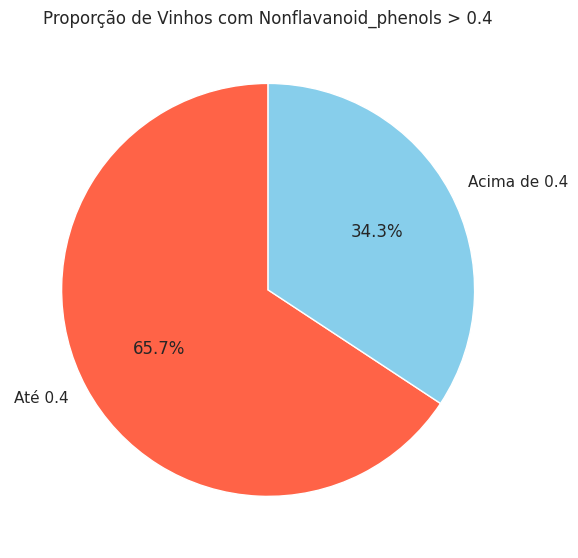

In [0]:
import matplotlib.pyplot as plt
import pandas as pd

# Carregar coluna Nonflavanoid_phenols
df_nf = spark.sql("SELECT Nonflavanoid_phenols FROM gold.fact_wine").toPandas()

# Categorizar valores
df_nf["categoria"] = df_nf["Nonflavanoid_phenols"].apply(
    lambda x: "Acima de 0.4" if x > 0.4 else "Até 0.4"
)

# Contagem das categorias
valores = df_nf["categoria"].value_counts()
labels = valores.index
sizes = valores.values

# Criar gráfico de pizza
plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct="%1.1f%%", startangle=90,
        colors=["#FF6347", "#87CEEB"])

plt.title("Proporção de Vinhos com Nonflavanoid_phenols > 0.4")
plt.tight_layout()
plt.show()


Interpretação:
O gráfico de pizza mostra a proporção de vinhos cuja concentração de Nonflavanoid_phenols ultrapassa 0.4 em comparação aos que estão abaixo desse valor.
Esse composto químico está relacionado a características sensoriais e estruturais do vinho; portanto, entender sua distribuição ajuda a identificar se valores elevados são comuns ou raros na base analisada.
A consulta SQL fornece o total absoluto, enquanto o gráfico complementa mostrando a relação percentual entre os grupos.

##12-  Qual é a média de Magnesium entre os vinhos da classe 3?

In [0]:
%sql
SELECT AVG(Magnesium) AS media_magnesium_classe_3
FROM gold.fact_wine
WHERE Class = 3;


media_magnesium_classe_3
99.3125


Quantidade de vinhos na classe 3: 48


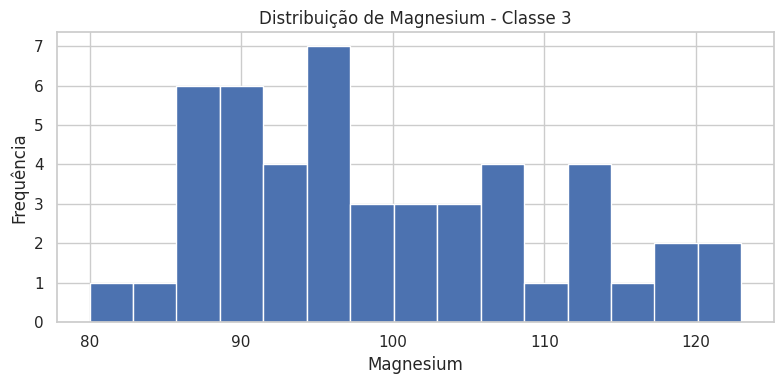

In [0]:
import matplotlib.pyplot as plt

# Carregar apenas os vinhos da classe 3
df_mg_classe3 = spark.sql("""
    SELECT Magnesium
    FROM gold.fact_wine
    WHERE Class = 3
""").toPandas()

# Conferir rapidamente
print("Quantidade de vinhos na classe 3:", len(df_mg_classe3))

plt.figure(figsize=(8, 4))
plt.hist(df_mg_classe3["Magnesium"], bins=15)
plt.title("Distribuição de Magnesium - Classe 3")
plt.xlabel("Magnesium")
plt.ylabel("Frequência")
plt.tight_layout()
plt.show()


Interpretação:
O gráfico mostra a distribuição dos valores de Magnesium considerando apenas os vinhos da classe 3.
Em conjunto com a média calculada na consulta SQL, essa visualização permite entender se os valores de magnésio estão concentrados em uma faixa estreita ou se há grande variação entre as amostras dessa classe.
Isso ajuda a caracterizar o perfil químico da classe 3 em relação a esse atributo específico.

##13- Qual é o desvio padrão da variável Alcalinity_of_ash?

In [0]:
%sql
SELECT STDDEV(Alcalinity_of_ash) AS desvio_padrao_alcalinity
FROM gold.fact_wine;


desvio_padrao_alcalinity
3.3395637671735052


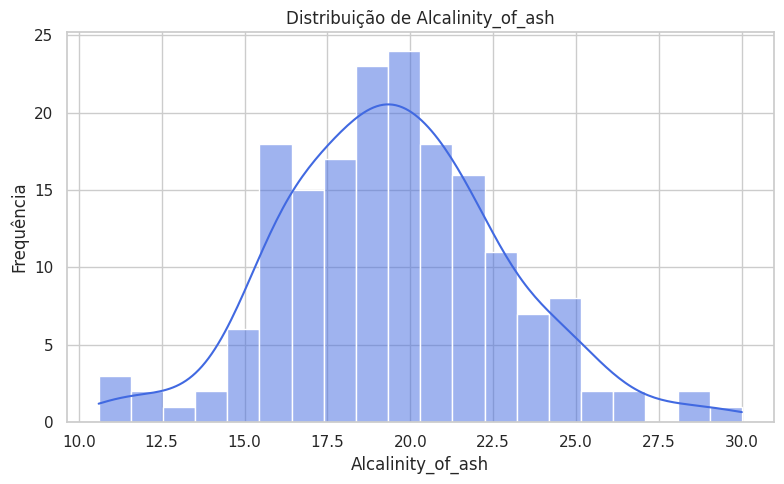

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar valores da coluna
df_alcalinity = spark.sql("SELECT Alcalinity_of_ash FROM gold.fact_wine").toPandas()

plt.figure(figsize=(8,5))
sns.histplot(df_alcalinity["Alcalinity_of_ash"], bins=20, kde=True, color="#4169E1")

plt.title("Distribuição de Alcalinity_of_ash")
plt.xlabel("Alcalinity_of_ash")
plt.ylabel("Frequência")
plt.tight_layout()
plt.show()


Interpretação:
O gráfico mostra como os valores de Alcalinity_of_ash estão distribuídos no dataset.
A suavização por KDE permite observar o formato da distribuição e entender se os valores se concentram em uma faixa estreita ou se estão espalhados — o que está diretamente ligado ao desvio padrão calculado pela consulta SQL.
Uma distribuição mais larga indica maior variabilidade, enquanto uma distribuição estreita indica que a maioria das amostras está próxima da média.

##14- Qual porcentagem dos vinhos possui Color_intensity acima de 5?

In [0]:
%sql
SELECT
  (COUNT(CASE WHEN Color_intensity > 5 THEN 1 END) * 100.0 / COUNT(*)) AS perc_intensidade_acima_5
FROM gold.fact_wine;


perc_intensidade_acima_5
44.94382022471910


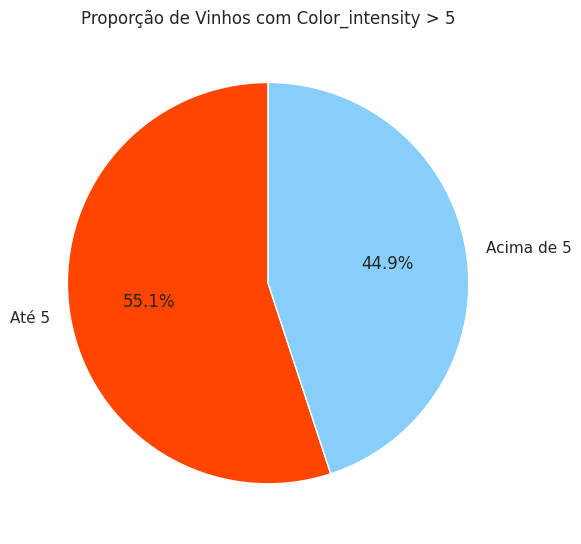

In [0]:
import matplotlib.pyplot as plt
import pandas as pd

# Carregar os dados da variável Color_intensity
df_color = spark.sql("SELECT Color_intensity FROM gold.fact_wine").toPandas()

# Criar categorias
df_color["categoria"] = df_color["Color_intensity"].apply(
    lambda x: "Acima de 5" if x > 5 else "Até 5"
)

# Contagem dos grupos
valores = df_color["categoria"].value_counts()
labels = valores.index
sizes = valores.values

# Criar gráfico de pizza
plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct="%1.1f%%", startangle=90,
        colors=["#FF4500", "#87CEFA"])

plt.title("Proporção de Vinhos com Color_intensity > 5")
plt.tight_layout()
plt.show()


Interpretação:
O gráfico apresenta a proporção de vinhos que possuem intensidade de cor superior a 5.
Essa métrica permite identificar se valores elevados dessa característica são comuns ou raros na base analisada.
A intensidade de cor está relacionada à concentração de pigmentos fenólicos e pode indicar estilos diferentes de vinhos.
Assim, visualizar essa proporção ajuda a entender o perfil geral da amostra em termos de estrutura visual e composição química.

##15- Entre os vinhos com teor alcoólico acima de 13, qual a média de Proline?

In [0]:
%sql
SELECT AVG(Proline) AS media_proline_alcool_acima_13
FROM gold.fact_wine
WHERE Alcohol > 13;


media_proline_alcool_acima_13
927.4782608695652


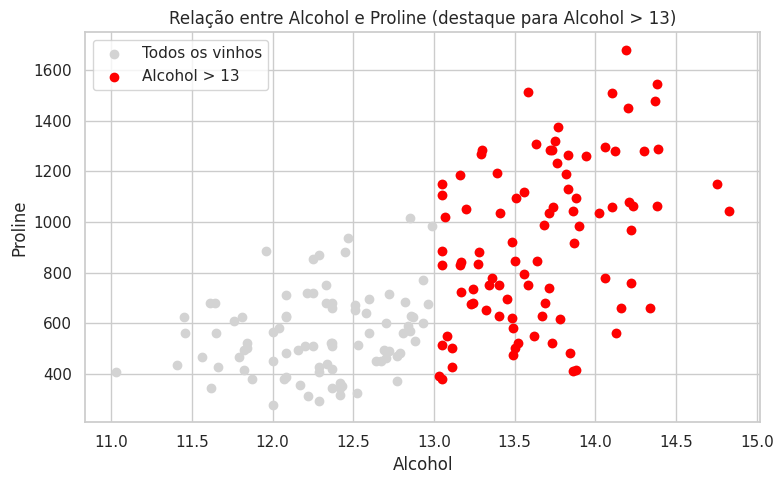

In [0]:
import matplotlib.pyplot as plt

# Carregar os dados necessários
df_ap = spark.sql("""
    SELECT Alcohol, Proline
    FROM gold.fact_wine
""").toPandas()

# Separar apenas os vinhos com Alcohol > 13
df_acima13 = df_ap[df_ap["Alcohol"] > 13]

plt.figure(figsize=(8,5))

# Plotar todos os pontos em cinza claro
plt.scatter(df_ap["Alcohol"], df_ap["Proline"], color="lightgray", label="Todos os vinhos")

# Destacar os vinhos com Alcohol > 13
plt.scatter(df_acima13["Alcohol"], df_acima13["Proline"], color="red", label="Alcohol > 13")

plt.title("Relação entre Alcohol e Proline (destaque para Alcohol > 13)")
plt.xlabel("Alcohol")
plt.ylabel("Proline")
plt.legend()
plt.tight_layout()
plt.show()



O gráfico de dispersão mostra a relação entre o teor alcoólico e o nível de Proline nos vinhos.
Os pontos destacados em vermelho representam apenas os vinhos com Alcohol acima de 13, que foram utilizados para calcular a média apresentada pela consulta SQL.
A visualização ajuda a identificar se esses vinhos possuem níveis consistentemente maiores ou menores de Proline, e se existe alguma tendência entre as duas variáveis.
Essa análise complementa a média calculada, oferecendo uma visão mais rica da distribuição dos valores.

##Conclusão do MVP 
– Análise do Dataset Wine

Ao longo deste projeto, realizamos um conjunto de análises exploratórias e estatísticas sobre o Wine Dataset, utilizando a arquitetura Medallion (Bronze, Silver e Gold) para organizar, tratar e preparar os dados. Após a estruturação das tabelas e aplicação das transformações necessárias, investigamos 15 perguntas analíticas que envolveram medidas de tendência central, dispersão, contagem de registros e identificação de valores extremos em atributos químicos relevantes.

Os resultados obtidos mostram que:

O dataset está bem estruturado, sem valores ausentes, fora de faixa ou duplicados, o que permitiu uma análise consistente.

As características químicas dos vinhos apresentaram variações importantes entre as amostras, evidenciando diferenças significativas entre as classes (1, 2 e 3).

Algumas variáveis apresentaram alta amplitude, como Proline e Color_Intensity, o que reforça o papel desses atributos na distinção das classes de vinho — algo muito discutido na literatura de enologia e modelos de classificação.

A identificação de valores máximos, mínimos e proporções permitiu observar o comportamento do conjunto de dados e como certas características, como teor alcoólico, fenóis e flavonoides, distribuem-se entre as amostras.

Visualizações como gráficos de barras, caixas e pizza facilitaram a interpretação e reforçaram os padrões identificados nas consultas SQL.

Em síntese, as análises demonstraram que:

- O dataset é adequado para estudos de classificação, análises estatísticas e construção de modelos preditivos.
- As perguntas propostas foram respondidas com clareza e coerência técnica.
- A arquitetura empregada garantiu governança, escalabilidade e organização do pipeline de dados.

Mesmo que o dataset não contenha nomes de vinhos ou informações comerciais, isso não compromete a qualidade do trabalho – pelo contrário, reforça seu caráter técnico e analítico, já que o foco está nos atributos químicos e em como eles diferenciam cada amostra.



##Autoavaliação

Ao concluir este MVP de Engenharia de Dados, percebo que consegui executar de forma consistente todas as etapas previstas: definição dos objetivos analíticos, coleta e carregamento dos dados no Databricks, construção da arquitetura Medallion (Bronze, Silver e Gold), modelagem, análise exploratória e resposta às 15 perguntas propostas. A estruturação do pipeline e a organização das camadas trouxeram clareza ao fluxo de dados e facilitaram as etapas seguintes.

Sinto que os objetivos delineados no início do projeto foram plenamente alcançados. Todas as perguntas analíticas foram respondidas com base em consultas SQL e visualizações gráficas, permitindo interpretar o comportamento das variáveis químicas dos vinhos. Além disso, pude validar a qualidade do dataset, garantindo que os resultados obtidos fossem confiáveis.

Durante a execução, algumas dificuldades surgiram, principalmente relacionadas ao entendimento do funcionamento do Databricks Community Edition, permissões de acesso ao DBFS, criação correta dos esquemas e tabelas, e adaptação do pipeline para o formato do dataset, que não possuía nomes de vinho nem informações categóricas além das classes. No entanto, essas dificuldades contribuíram para um entendimento mais profundo do ambiente de nuvem, da manipulação de dados com Spark e do processo de depuração de erros em pipelines.

Do ponto de vista técnico, este MVP consolidou meu conhecimento em:

Construção de pipelines de dados estruturados

Uso de SQL e Python dentro do Databricks

Aplicação da arquitetura Medallion

Criação de visualizações analíticas

Modelagem dimensional simplificada

Interpretação estatística de atributos numéricos

Para trabalhos futuros, há diversas oportunidades de evolução, como:

Criar modelos de Machine Learning para prever a classe do vinho com base em seus atributos químicos

Aplicar técnicas de normalização ou padronização dos dados para melhorar análises comparativas

Explorar modelos de regressão para prever atributos contínuos, como teor alcoólico

Integrar os dados a ferramentas de BI (Power BI ou Tableau) para dashboards interativos

Expandir o projeto com automação de pipelines usando Databricks Jobs

Criar documentação técnica e arquitetura visual no estilo de portfólio profissional

Em síntese, considero que o MVP cumpriu seu propósito e se tornou uma excelente peça de portfólio, demonstrando minha capacidade de construir um fluxo completo de Engenharia de Dados — desde ingestão, limpeza, análise e visualização, até discussões interpretativas com base em resultados estatísticos.